<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Математика для Data Science. Нетология. Лекция 4.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Методы математической оптимизации

Имеется задача классификации. Нужно определить, к какому классу относится тот или иной элемент. Если используется двухмерное пространство, то мы ищем прямую, которая будет отделять два класса максимально равномерно. 

Загрузим датасет для классификации: heart desease (https://www.kaggle.com/bgr2089/heart-analysis).

*  age
*  sex
*  cp chest pain type (4 values)
*  trestbps resting blood pressure
*  chol serum cholestoral in mg/dl
*  fbs fasting blood sugar > 120 mg/dl
*  restecg resting electrocardiographic results (values 0,1,2)
*  thalach maximum heart rate achieved
*  exang exercise induced angina
*  oldpeak = ST depression induced by exercise relative to rest. A test that indicates a high probability of coronary artery disease is one in which there is substantial ST depression at low work rate associated with   typical angina-like pain and a drop in blood pressure. Deeper and more widespread ST depression generally indicates more severe or extensive disease.
*  the slope of the peak exercise ST segment
*  ca number of major vessels (0-3) colored by flourosopy
*  thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
*  target - ill or not

Каждый человек в датасете имеет сердечную болезнь в диапазоне от 0 (есть болезнь) до 4 (нет болезни). Таким образом, данный датасет - типичная проблема классификации, где всего 5 классов, включая класс 0.

In [73]:
url="http://yustiks.ru/dataset/heart.csv"
data=pd.read_csv(url)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Возьмём двухмерное пространство. Допустим, мы хотим на основе имеющихся атрибутов (cp - тип боли в груди и chol - уровень холестерола) определять болен человек или здоров. Первое - мы хотим научиться определять класс 0 (больных). Наша задача - найти прямую, которая будет отделять класс 0 от всех остальных в пространстве. 

In [0]:
var1 = 'oldpeak'
var2 = 'cp'

In [0]:
X = data.loc[:, [var1, var2]]
Y = data.loc[:, ['target']]

Итак, у нас есть вектора X, где каждый вектор - это атрибуты человека (cp и chol).
Мы хотим находить в датасете только больных людей.
Отобразим в пространстве больных людей и всех остальных:

In [0]:
list_indexes_class0 = Y[Y['target']==0].index.values.tolist()

In [0]:
list_indexes_class1 = Y[Y['target']==1].index.values.tolist()

In [0]:
X0 = X.loc[list_indexes_class0, :]
X1 = X.loc[list_indexes_class1, :]

Отобразим 2 класса в пространстве

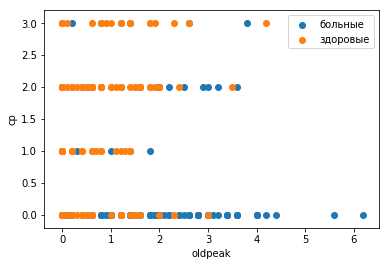

In [96]:
plt.xlabel(var1)
plt.ylabel(var2)

plt.scatter(X0.loc[:, var1], X0.loc[:, var2])
plt.scatter(X1.loc[:, var1], X1.loc[:, var2])
plt.legend(['больные', 'здоровые'])
plt.show()

Задача классификатора - подобрать такую прямую, которая будет отделять один класс от другого максимально далеко в пространстве.

В данном случае (если посмотреть на данные), можно провести прямую приблизительно так, чтобы отделять один класс от другого:
![alt text](https://sun9-55.userapi.com/c855232/v855232121/e05f8/P2gG1zvM3wY.jpg)

Я определила прямую графически, задача логистической регрессии - найти данную прямую математически.